In [60]:
import numpy as np
import xarray as xr
import pandas as pd

In [61]:
reflectanceFilePath = './EMIT_L2A_RFL_001_20220811T001233_2222216_001.nc'
mineralFilePath = './EMIT_L2B_MIN_001_20220811T001233_2222216_001.nc'

In [62]:
refl = xr.open_dataset(reflectanceFilePath)
cropDowntrack = int(refl.dims['downtrack']/2)
cropCrosstrack = int(refl.dims['crosstrack']/2)
refl = refl.sel(downtrack=slice(0, cropDowntrack), crosstrack=slice(0, cropCrosstrack))

minerals = xr.open_dataset(mineralFilePath)
minerals = minerals.sel(downtrack=slice(0, cropDowntrack), crosstrack=slice(0, cropCrosstrack))

In [63]:
groundTruth = minerals['group_1_mineral_id'].values
del minerals

In [64]:
groundTruth = groundTruth[~np.isnan(groundTruth).any(axis=1)]

In [65]:
hsiData = refl['reflectance'].values
del refl

In [66]:
X = hsiData.reshape(-1, hsiData.shape[2])

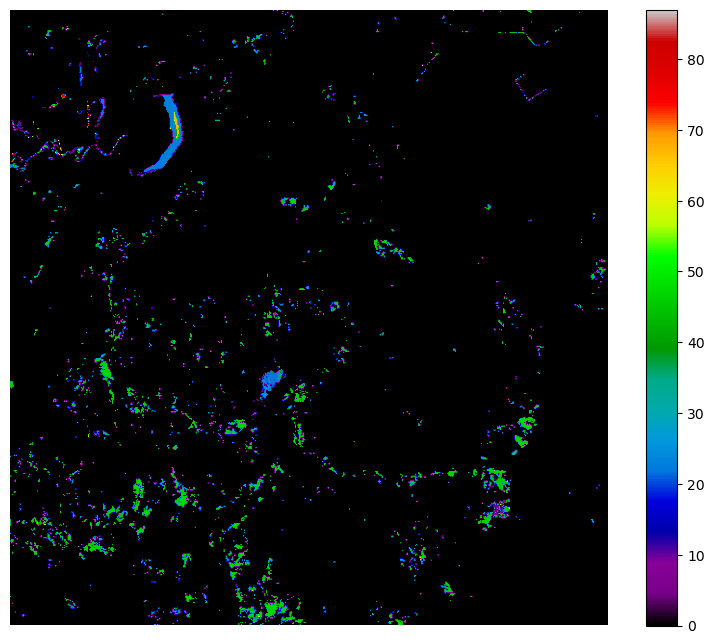

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(groundTruth, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.show()

In [68]:
X = pd.DataFrame(X)

In [69]:
X = X.dropna()

In [70]:
X = X.loc[:, ~(X == -0.01).any()]

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [72]:
from joblib import load
model = load('./svm_95acc_class-weights.pkl') 

In [73]:
predictions = model.predict(X)

In [74]:
predictions = predictions.reshape(groundTruth.shape)

In [75]:
nonBackgroundPreds = np.where(groundTruth != 0, predictions, groundTruth)

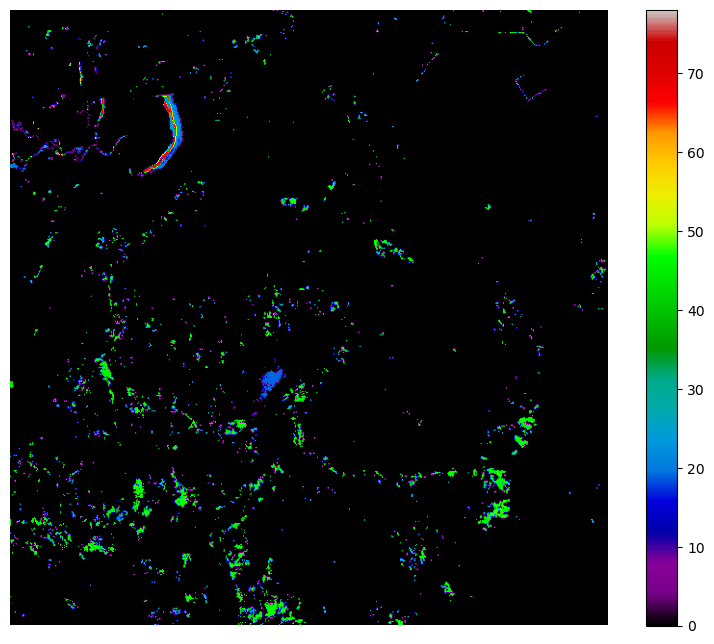

In [76]:
plt.figure(figsize=(10, 8))
plt.imshow(nonBackgroundPreds, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.show()